In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf
tf.__version__

'2.2.0-rc3'

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,Flatten,GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Embedding

In [0]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/headlines.csv')

In [7]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [8]:
df.shape

(26709, 3)

In [9]:
headlines=df['headline']
headlines

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
26704                 american politics in moral free-fall
26705                              america's best 20 hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie 2014
Name: headline, Length: 26709, dtype: object

In [10]:
label=df['is_sarcastic']
label

0        0
1        0
2        1
3        1
4        0
        ..
26704    0
26705    0
26706    0
26707    0
26708    0
Name: is_sarcastic, Length: 26709, dtype: int64

## Splitting The Data



In [0]:
x_train,x_test,y_train,y_test=train_test_split(headlines,label,test_size=0.3)

## Preparing the train data




In [0]:
tokenizer=Tokenizer(num_words=5000)

In [0]:
tokenizer.fit_on_texts(x_train)

In [14]:
word_index=tokenizer.word_index
word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'this': 18,
 'by': 19,
 'up': 20,
 'after': 21,
 'out': 22,
 'be': 23,
 'as': 24,
 'that': 25,
 'how': 26,
 'it': 27,
 'not': 28,
 'your': 29,
 'are': 30,
 'what': 31,
 'just': 32,
 'has': 33,
 'his': 34,
 'he': 35,
 'all': 36,
 'who': 37,
 'will': 38,
 'more': 39,
 'year': 40,
 'into': 41,
 'report': 42,
 'u': 43,
 'have': 44,
 'area': 45,
 'one': 46,
 'donald': 47,
 's': 48,
 'over': 49,
 'why': 50,
 'day': 51,
 'says': 52,
 'first': 53,
 'can': 54,
 'woman': 55,
 'time': 56,
 'old': 57,
 'her': 58,
 "trump's": 59,
 'no': 60,
 'like': 61,
 'get': 62,
 'now': 63,
 'life': 64,
 'off': 65,
 'an': 66,
 'still': 67,
 'obama': 68,
 'was': 69,
 'people': 70,
 'house': 71,
 'white': 72,
 'than': 73,
 'make': 74,
 'if': 75,
 'women': 76,
 "'": 77,
 'clinton': 78,
 'back': 79,
 'my': 80,
 'i': 81,
 'dow

In [0]:
train_sequence=tokenizer.texts_to_sequences(x_train)  

In [0]:
training_padded = pad_sequences(train_sequence, padding='post',truncating='post',)

## Preparing the test data



In [0]:
test_sequence=tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sequence, padding='post',truncating='post')

## Building And Testing Accuracy Different Models




### Simple Model with ANN

In [0]:
model1=Sequential()

In [0]:
model1.add(Embedding(input_dim=5000,output_dim=16))
model1.add(GlobalAveragePooling1D())
model1.add(Dense(units=32,activation='relu'))
model1.add(Dense(units=1,activation='sigmoid'))

In [20]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          80000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 80,577
Trainable params: 80,577
Non-trainable params: 0
_________________________________________________________________


In [0]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history=model1.fit(training_padded,y_train,epochs=10,validation_data=(test_padded,y_test))

Epoch 1/10
585/585 [==============================] - 3s 5ms/step - loss: 0.5802 - accuracy: 0.6891 - val_loss: 0.4009 - val_accuracy: 0.8331
Epoch 2/10
585/585 [==============================] - 2s 4ms/step - loss: 0.3407 - accuracy: 0.8577 - val_loss: 0.3530 - val_accuracy: 0.8424
Epoch 3/10
585/585 [==============================] - 2s 4ms/step - loss: 0.2766 - accuracy: 0.8864 - val_loss: 0.3445 - val_accuracy: 0.8497
Epoch 4/10
585/585 [==============================] - 2s 4ms/step - loss: 0.2438 - accuracy: 0.9006 - val_loss: 0.3563 - val_accuracy: 0.8486
Epoch 5/10
585/585 [==============================] - 2s 4ms/step - loss: 0.2236 - accuracy: 0.9101 - val_loss: 0.3915 - val_accuracy: 0.8398
Epoch 6/10
585/585 [==============================] - 2s 4ms/step - loss: 0.2084 - accuracy: 0.9153 - val_loss: 0.3913 - val_accuracy: 0.8458
Epoch 7/10
585/585 [==============================] - 2s 4ms/step - loss: 0.1964 - accuracy: 0.9224 - val_loss: 0.4097 - val_accuracy: 0.8449
Epoch 

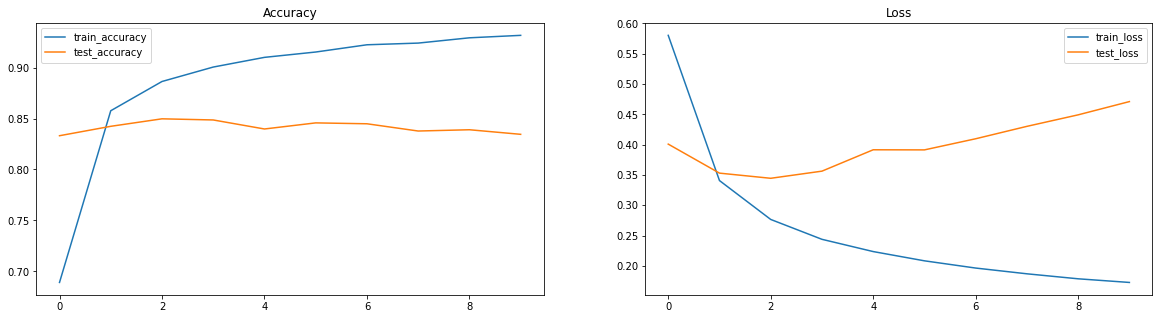

In [23]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.set_title('Accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.set_title('Loss')
ax2.legend()
plt.show()

### Bidirectional Single Layer LSTM

In [0]:
model2=Sequential()

In [0]:
model2.add(Embedding(input_dim=5000,output_dim=32))
model2.add(Bidirectional(LSTM(64)))
model2.add(Dense(units=32,activation='relu'))
model2.add(Dense(units=1,activation='sigmoid'))

In [26]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49664     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 213,825
Trainable params: 213,825
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
history=model2.fit(training_padded,y_train,epochs=10,validation_data=(test_padded,y_test))

Epoch 1/10
585/585 [==============================] - 6s 11ms/step - loss: 0.4125 - accuracy: 0.7962 - val_loss: 0.3308 - val_accuracy: 0.8532
Epoch 2/10
585/585 [==============================] - 6s 10ms/step - loss: 0.2630 - accuracy: 0.8885 - val_loss: 0.3351 - val_accuracy: 0.8570
Epoch 3/10
585/585 [==============================] - 6s 10ms/step - loss: 0.2027 - accuracy: 0.9160 - val_loss: 0.3630 - val_accuracy: 0.8530
Epoch 4/10
585/585 [==============================] - 6s 10ms/step - loss: 0.1493 - accuracy: 0.9424 - val_loss: 0.4302 - val_accuracy: 0.8519
Epoch 5/10
585/585 [==============================] - 6s 10ms/step - loss: 0.1149 - accuracy: 0.9564 - val_loss: 0.4978 - val_accuracy: 0.8393
Epoch 6/10
585/585 [==============================] - 6s 10ms/step - loss: 0.0885 - accuracy: 0.9683 - val_loss: 0.5278 - val_accuracy: 0.8409
Epoch 7/10
585/585 [==============================] - 6s 10ms/step - loss: 0.0645 - accuracy: 0.9781 - val_loss: 0.6358 - val_accuracy: 0.8371

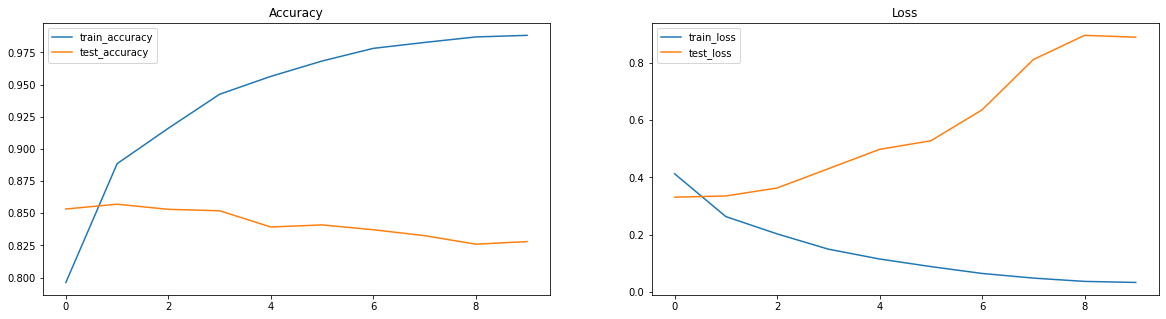

In [29]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.set_title('Accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.set_title('Loss')
ax2.legend()
plt.show()

### Bidirectional Multilayer Layer LSTM

In [0]:
model3=Sequential()

In [0]:
model3.add(Embedding(input_dim=5000,output_dim=32))
model3.add(Bidirectional(LSTM(64,return_sequences=True)))
model3.add(Bidirectional(LSTM(32)))
model3.add(Dense(units=64,activation='relu'))
model3.add(Dense(units=1,activation='sigmoid'))

In [36]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         49664     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 255,105
Trainable params: 255,105
Non-trainable params: 0
_________________________________________________________________


In [0]:
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history=model3.fit(training_padded,y_train,epochs=10,validation_data=(test_padded,y_test))

Epoch 1/10
585/585 [==============================] - 9s 16ms/step - loss: 0.4073 - accuracy: 0.8033 - val_loss: 0.3334 - val_accuracy: 0.8551
Epoch 2/10
585/585 [==============================] - 8s 14ms/step - loss: 0.2533 - accuracy: 0.8939 - val_loss: 0.3313 - val_accuracy: 0.8559
Epoch 3/10
585/585 [==============================] - 8s 14ms/step - loss: 0.1853 - accuracy: 0.9280 - val_loss: 0.3981 - val_accuracy: 0.8536
Epoch 4/10
585/585 [==============================] - 8s 14ms/step - loss: 0.1405 - accuracy: 0.9458 - val_loss: 0.4383 - val_accuracy: 0.8418
Epoch 5/10
585/585 [==============================] - 8s 14ms/step - loss: 0.1037 - accuracy: 0.9631 - val_loss: 0.4785 - val_accuracy: 0.8413
Epoch 6/10
585/585 [==============================] - 8s 14ms/step - loss: 0.0775 - accuracy: 0.9725 - val_loss: 0.5536 - val_accuracy: 0.8379
Epoch 7/10
585/585 [==============================] - 8s 15ms/step - loss: 0.0614 - accuracy: 0.9788 - val_loss: 0.6582 - val_accuracy: 0.8330

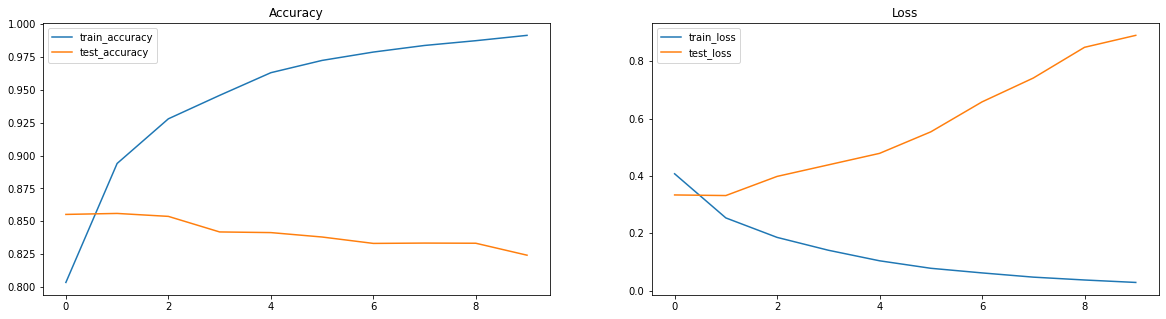

In [34]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.set_title('Accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.set_title('Loss')
ax2.legend()
plt.show()

### Single Layer LSTM

In [0]:
model4=Sequential()

In [0]:
model4.add(Embedding(input_dim=5000,output_dim=32))
model4.add(LSTM(62))
model4.add(Dense(units=64,activation='relu'))
model4.add(Dense(units=1,activation='sigmoid'))

In [39]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          160000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 62)                23560     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4032      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 187,657
Trainable params: 187,657
Non-trainable params: 0
_________________________________________________________________


In [0]:
model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
history=model4.fit(training_padded,y_train,epochs=10,validation_data=(test_padded,y_test))

Epoch 1/10
585/585 [==============================] - 5s 8ms/step - loss: 0.4504 - accuracy: 0.7753 - val_loss: 0.3676 - val_accuracy: 0.8444
Epoch 2/10
585/585 [==============================] - 4s 8ms/step - loss: 0.2879 - accuracy: 0.8817 - val_loss: 0.3823 - val_accuracy: 0.8418
Epoch 3/10
585/585 [==============================] - 4s 8ms/step - loss: 0.2426 - accuracy: 0.9005 - val_loss: 0.3642 - val_accuracy: 0.8480
Epoch 4/10
585/585 [==============================] - 4s 8ms/step - loss: 0.2116 - accuracy: 0.9138 - val_loss: 0.4071 - val_accuracy: 0.8409
Epoch 5/10
585/585 [==============================] - 4s 7ms/step - loss: 0.1749 - accuracy: 0.9237 - val_loss: 0.4851 - val_accuracy: 0.8330
Epoch 6/10
585/585 [==============================] - 4s 7ms/step - loss: 0.1541 - accuracy: 0.9311 - val_loss: 0.4983 - val_accuracy: 0.8361
Epoch 7/10
585/585 [==============================] - 4s 7ms/step - loss: 0.1340 - accuracy: 0.9375 - val_loss: 0.5068 - val_accuracy: 0.8368
Epoch 

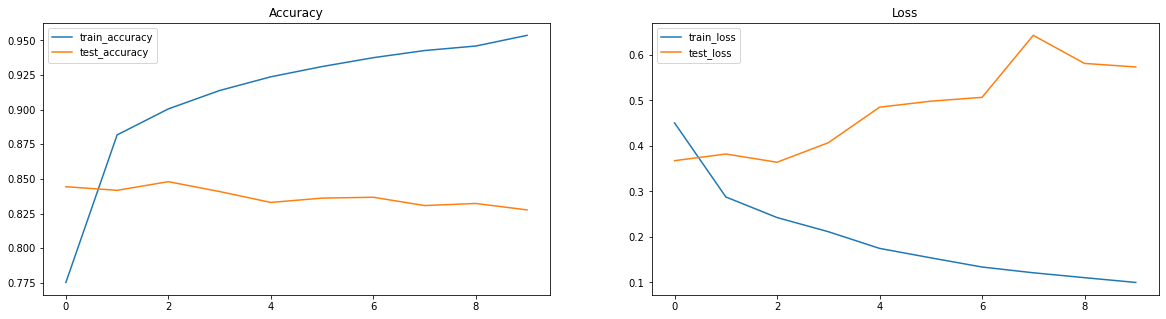

In [42]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.set_title('Accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.set_title('Loss')
ax2.legend()
plt.show()